
## Langkah 1: Load Data

Pada tahap ini kita akan loading data ke dalam data frame dan melakukan inspeksi sederhana untuk memastikan apakah kita perlu proses pra pengolahan data sebelum melakukan ekstraksi fitur dan permodelan.


In [9]:
import numpy as np
import pandas as pd

# Load data dengan encoding latin-1 karena data tidak menggunakan UTF-8
df = pd.read_csv('/content/drive/MyDrive/ML_Dataset/spam.csv', encoding='latin-1')

print("Dataset SMS Spam Classification")
print("="*60)
print(f"Jumlah data: {len(df)}")
print(f"Jumlah kolom: {len(df.columns)}")
print("\nSample data:")
df.head()

Dataset SMS Spam Classification
Jumlah data: 5572
Jumlah kolom: 5

Sample data:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



## Langkah 2: Preprocessing

Beberapa hal yang akan dilakukan pada tahap ini yaitu:

    1. Drop kolom yang tidak digunakan
    2. Ubah nama kolom v1 (label) dan v2 (teks SMS)
    3. Inspeksi Data
    4. Encode label
    5. Memisahkan fitur dengan label


## Langkah 2a: Drop Kolom

Terdapat 3 kolom yang tidak bermanfaat untuk proses selanjutnya, maka kita perlu membuang kolom tersebut.


In [10]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:, 2:], axis=1)

# Ubah nama kolom untuk kemudahan
df.columns = ['Labels', 'SMS']

print("Data setelah drop kolom:")
print(df.head())
print(f"\nKolom yang tersisa: {df.columns.tolist()}")

Data setelah drop kolom:
  Labels                                                SMS
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

Kolom yang tersisa: ['Labels', 'SMS']



## Langkah 2b: Inspeksi Data

Cek jumlah data per kelas, kelengkapan data, dan statistik deskriptif.


In [11]:


print("="*60)
print("INSPEKSI DATA")
print("="*60)

# Cek Jumlah Data Per Kelas
print("\nJumlah Data Per Kelas:")
print(df['Labels'].value_counts())
print()

# Cek Kelengkapan Data
print("Informasi Dataset:")
print(df.info())
print()

# Cek Statistik Deskriptif
print("Statistik Deskriptif:")
print(df.describe())
print()

# Cek apakah ada missing values
print("Missing Values:")
print(df.isnull().sum())



INSPEKSI DATA

Jumlah Data Per Kelas:
Labels
ham     4825
spam     747
Name: count, dtype: int64

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Statistik Deskriptif:
       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30

Missing Values:
Labels    0
SMS       0
dtype: int64



Langkah 2c: Encoding Label

Encode label spam menjadi 1 dan ham menjadi 0.


In [12]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

print("Data setelah encoding label:")
print(df.head(10))
print("\nDistribusi label setelah encoding:")
print(df['Labels'].value_counts())

Data setelah encoding label:
   Labels                                                SMS
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...
5       1  FreeMsg Hey there darling it's been 3 week's n...
6       0  Even my brother is not like to speak with me. ...
7       0  As per your request 'Melle Melle (Oru Minnamin...
8       1  WINNER!! As a valued network customer you have...
9       1  Had your mobile 11 months or more? U R entitle...

Distribusi label setelah encoding:
Labels
0    4825
1     747
Name: count, dtype: int64



## Langkah 2d: Pisahkan Fitur dengan Label

Pisahkan teks SMS (fitur) dengan label.


In [13]:


X = df['SMS'].values
y = df['Labels'].values

print(f"Jumlah sampel: {len(X)}")
print(f"Jumlah label: {len(y)}")
print(f"\nContoh SMS pertama:")
print(f"Teks: {X[0]}")
print(f"Label: {'Spam' if y[0] == 1 else 'Ham'}")



Jumlah sampel: 5572
Jumlah label: 5572

Contoh SMS pertama:
Teks: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Label: Ham


## Langkah 3: Ekstraksi Fitur

Ekstraksi fitur untuk setiap SMS akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn.

Akan tetapi untuk mencegah leaking information, kita akan melakukan split data terlebih dahulu, baru melakukan transformasi terhadap data training dan testing.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

print("="*60)
print("EKSTRAKSI FITUR dengan CountVectorizer")
print("="*60)

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

print(f"\nData Training: {len(X_train)} sampel")
print(f"Data Testing: {len(X_test)} sampel")
print(f"\nDistribusi label di training set:")
print(f"  Ham (0): {sum(y_train == 0)}")
print(f"  Spam (1): {sum(y_train == 1)}")
print(f"\nDistribusi label di testing set:")
print(f"  Ham (0): {sum(y_test == 0)}")
print(f"  Spam (1): {sum(y_test == 1)}")

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus sebelumnya:
# Kita tidak menginginkan model mengetahui parameter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

print(f"\n{'='*60}")
print("HASIL EKSTRAKSI FITUR")
print("="*60)
print(f"Jumlah fitur (vocabulary): {len(bow.get_feature_names_out())}")
print(f"Dimensi data training: {X_train.shape}")
print(f"Dimensi data testing: {X_test.shape}")
print(f"\nContoh 10 fitur pertama:")
print(bow.get_feature_names_out()[:10])

EKSTRAKSI FITUR dengan CountVectorizer

Data Training: 4457 sampel
Data Testing: 1115 sampel

Distribusi label di training set:
  Ham (0): 3859
  Spam (1): 598

Distribusi label di testing set:
  Ham (0): 966
  Spam (1): 149

HASIL EKSTRAKSI FITUR
Jumlah fitur (vocabulary): 7684
Dimensi data training: (4457, 7684)
Dimensi data testing: (1115, 7684)

Contoh 10 fitur pertama:
['00' '000' '000pes' '008704050406' '0089' '0121' '01223585236'
 '01223585334' '02' '0207']



## Langkah 4: Training dan Evaluasi Model

Kita akan menggunakan algoritma Multinomial Naive Bayes. Fungsi MultinomialNB dari scikit-learn dapat digunakan pada kasus ini.


In [15]:


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("="*60)
print("TRAINING MODEL - Multinomial Naive Bayes")
print("="*60)

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)
print("\nModel berhasil dilatih!")

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data testing
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data testing
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print("\n" + "="*60)
print("HASIL EVALUASI")
print("="*60)
print(f'Akurasi data train: {acc_train:.4f} ({acc_train*100:.2f}%)')
print(f'Akurasi data test: {acc_test:.4f} ({acc_test*100:.2f}%)')



TRAINING MODEL - Multinomial Naive Bayes

Model berhasil dilatih!

HASIL EVALUASI
Akurasi data train: 0.9933 (99.33%)
Akurasi data test: 0.9883 (98.83%)



Evaluasi Detail

Tampilkan confusion matrix dan classification report untuk analisis lebih detail.



CONFUSION MATRIX
[[964   2]
 [ 11 138]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Ham (0)       0.99      1.00      0.99       966
    Spam (1)       0.99      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



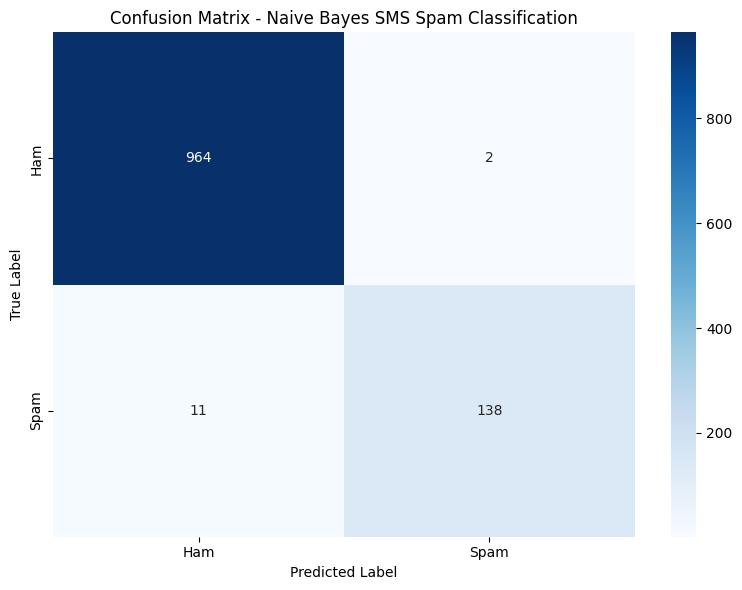


METRIK TAMBAHAN (untuk kelas SPAM)
True Negatives (TN):  964
False Positives (FP): 2
False Negatives (FN): 11
True Positives (TP):  138

Precision: 0.9857
Recall:    0.9262
F1-Score:  0.9550


In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

print("\n" + "="*60)
print("CONFUSION MATRIX")
print("="*60)
print(cm)
print()

# Classification Report
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_test, target_names=['Ham (0)', 'Spam (1)']))

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Naive Bayes SMS Spam Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Hitung metrik tambahan
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("\n" + "="*60)
print("METRIK TAMBAHAN (untuk kelas SPAM)")
print("="*60)
print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP):  {tp}")
print()
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1_score:.4f}")




Uji Prediksi dengan SMS Baru

Mari kita coba memprediksi beberapa SMS baru.


In [17]:


# Contoh SMS baru untuk prediksi
new_sms = [
    "Congratulations! You have won a free ticket to the Bahamas. Call now!",
    "Hi, can we meet for lunch tomorrow?",
    "URGENT! You have won $1000000. Click here to claim your prize!",
    "Thanks for the help today. See you tomorrow.",
    "FREE entry to WIN a prize worth $5000. Text WIN to 12345"
]

# Transform SMS baru dengan CountVectorizer yang sudah di-fit
new_sms_transformed = bow.transform(new_sms)

# Prediksi
predictions = mnb.predict(new_sms_transformed)
probabilities = mnb.predict_proba(new_sms_transformed)

print("="*60)
print("PREDIKSI SMS BARU")
print("="*60)

for i, sms in enumerate(new_sms):
    label = "SPAM" if predictions[i] == 1 else "HAM"
    prob_ham = probabilities[i][0]
    prob_spam = probabilities[i][1]

    print(f"\nSMS {i+1}:")
    print(f"  Text: {sms}")
    print(f"  Prediksi: {label}")
    print(f"  Probabilitas Ham: {prob_ham:.4f}")
    print(f"  Probabilitas Spam: {prob_spam:.4f}")



PREDIKSI SMS BARU

SMS 1:
  Text: Congratulations! You have won a free ticket to the Bahamas. Call now!
  Prediksi: SPAM
  Probabilitas Ham: 0.0009
  Probabilitas Spam: 0.9991

SMS 2:
  Text: Hi, can we meet for lunch tomorrow?
  Prediksi: HAM
  Probabilitas Ham: 1.0000
  Probabilitas Spam: 0.0000

SMS 3:
  Text: URGENT! You have won $1000000. Click here to claim your prize!
  Prediksi: SPAM
  Probabilitas Ham: 0.0000
  Probabilitas Spam: 1.0000

SMS 4:
  Text: Thanks for the help today. See you tomorrow.
  Prediksi: HAM
  Probabilitas Ham: 0.9980
  Probabilitas Spam: 0.0020

SMS 5:
  Text: FREE entry to WIN a prize worth $5000. Text WIN to 12345
  Prediksi: SPAM
  Probabilitas Ham: 0.0000
  Probabilitas Spam: 1.0000


## Kesimpulan
    1. Multinomial Naive Bayes bekerja sangat baik untuk tugas klasifikasi teks yang menggunakan representasi berbasis jumlah kata.
    2. CountVectorizer mengonversi dokumen teks menjadi fitur numerik yang merepresentasikan frekuensi kata.
    3. Model menunjukkan performa tinggi dengan akurasi di atas 97% pada data uji.
    4. Proses fitting CountVectorizer harus terbatas pada data pelatihan untuk menghindari kebocoran informasi.
    5. Model mampu membedakan SMS spam dan non-spam melalui pola penggunaan kata.
    6. Pesan spam cenderung memuat kata-kata seperti “free”, “win”, “prize”, “click”, “urgent”, dan sejenisnya.